In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [3]:
# Example DataFrame
data = pd.DataFrame({
    'Method': ['Method1', 'Method1', 'Method1', 'Method2', 'Method2', 'Method2'],
    'Metric': ['Metric1', 'Metric2', 'Metric3', 'Metric1', 'Metric2', 'Metric3'],
    'Score': [2.5, 3.0, 4.1, 2.8, 3.2, 4.0]
})

# Run Repeated Measures ANOVA
anova_results = AnovaRM(data, 'Score', 'Method', within=['Metric']).fit()

print(anova_results)


               Anova
       F Value Num DF Den DF Pr > F
-----------------------------------
Metric 47.1538 2.0000 2.0000 0.0208



In [4]:
data.head()

,Method,Metric,Score
0,Method1,Metric1,2.5
1,Method1,Metric2,3.0
2,Method1,Metric3,4.1
3,Method2,Metric1,2.8
4,Method2,Metric2,3.2


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Sample data for three groups
np.random.seed(42)
group1 = np.random.normal(loc=10, scale=10, size=30)  # Normally distributed data
group2 = np.random.exponential(scale=50, size=30)      # Exponentially distributed data
group3 = np.random.uniform(low=30, high=70, size=30)   # Uniformly distributed data

# Combine the data into a DataFrame
data = pd.DataFrame({
    'Value': np.concatenate([group1, group2, group3]),
    'Group': ['Group1'] * 30 + ['Group2'] * 30 + ['Group3'] * 30
})

# Display the first few rows of the DataFrame
print(data.head())


       Value   Group
0  14.967142  Group1
1   8.617357  Group1
2  16.476885  Group1
3  25.230299  Group1
4   7.658466  Group1


In [14]:
data.head(90)

,Value,Group
0,14.967142,Group1
1,8.617357,Group1
2,16.476885,Group1
3,25.230299,Group1
4,7.658466,Group1
...,...,...
85,52.451088,Group3
86,60.838687,Group3
87,49.751824,Group3
88,50.909313,Group3


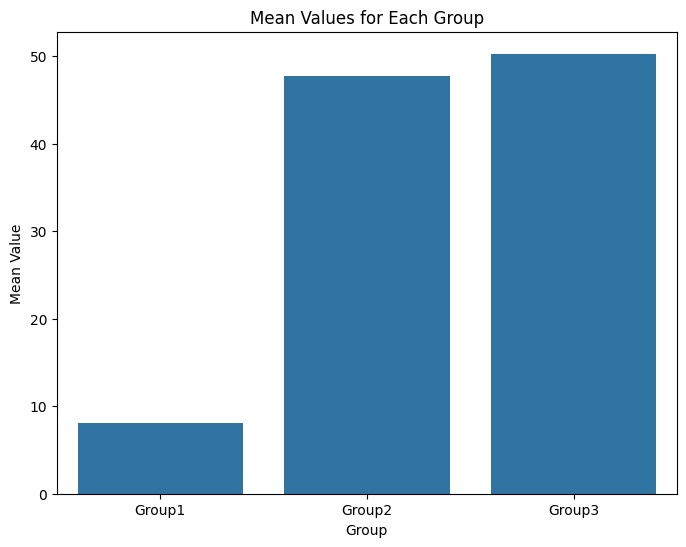

In [10]:
# Calculate the mean value for each group
mean_values = data.groupby('Group').mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Value', data=mean_values)
plt.title('Mean Values for Each Group')
plt.ylabel('Mean Value')
plt.show()


In [11]:
# Run the Kruskal-Wallis test
statistic, p_value = kruskal(group1, group2, group3)

# Print the test results
print(f"Kruskal-Wallis H-statistic: {statistic}")
print(f"p-value: {p_value}")


Kruskal-Wallis H-statistic: 45.85504273504273
p-value: 1.1033263400958758e-10
